## Location Selection Analysis for Handshake Beverage Stores - A Case Study of Taipei
Han-Sheng Huang  
2022

### Background
Location is an really important factor to influence the performance of handshake beverage stores. Therefore, this report would like to provide a tool to help beverage companies do the location selection according to some relative information, such as rental price, reginal income, number of MRT stations within 500 meters et al.

### Data
1. The addresses of store were collected from the official website of the beverage companies, including [milkshop](https://www.milkshoptea.com/en/), [50lan](http://50lan.com/), [chinshin](https://www.chingshin.tw/), [MACU](https://www.maculife.com.tw/), [chunshuitang](https://chunshuitang.com.tw/)
2. Population data were colleced from [Department of Civil Affairs, Taipei City Government](https://english.ca.gov.taipei/)
3. Rental price data were collected from [Dept of Land Administration, M. O. I., Taiwan](https://www.land.moi.gov.tw/enhtml/index)
4. MRT stations address were colected from [Taipei Metro](https://english.metro.taipei/)
5. Regional income data were collected from [open data platform, Taiwan](https://data.gov.tw/dataset/103066)
6. Tourist attractions address were collected from [Tourism Bureau, M.O.T.C., Taiwan](https://www.taiwan.net.tw/m1.aspx?sNo=0001090)
7. Othere sources: [School1](https://www.doe.gov.taipei/Default.aspx), [School2](https://ulist.moe.gov.tw/Query/Area/N1), [Mall](https://zh.wikipedia.org/wiki/%E8%87%BA%E5%8C%97%E5%B8%82%E8%B3%BC%E7%89%A9%E4%B8%AD%E5%BF%83%E5%88%97%E8%A1%A8), [Income and expenditure survey](https://dbas.gov.taipei/News.aspx?n=783F3F5F4E6C457E&sms=CF3C6E6E7767448F), [Tourist attractions](https://asiayo.com/event/taipei_fit.html)

### Analysis
Because we want to get an interpretable outcome, we select tree-based models, such as decision tree, random forest, and gradient boosting decistion tree, for the problem.  
The target (y variable) of the problem is whether an location is suitable for beverage store. The features (x variables) could be classified into three main group: demographic data, economic indicators, and number of important place. 

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn import preprocessing, linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
data=pd.read_csv("all_merge_afterdelete.csv",encoding='Big5')
data

,name,MRT_min_distance,MRT_count_500,MRT_count_1000,mall_distance500,mall_distance1000,school_distance500,school_distance1000,school_distance1500,spot_distance_1000,...,高中職,國中,國小,自修,不識字,所得中位數,購買力指數,零售飽和指數,租金,選址成功
0,迷客夏農安店,0.7,0,2,0,0,3,9,14,3,...,0.247804,0.067583,0.063528,0.002478,0.002478,723,0.091203,4.504460e+08,446.000000,1
1,迷客夏遼寧店,0.6,0,3,1,4,1,3,5,1,...,0.203498,0.061578,0.048096,0.000729,0.001822,824,0.091203,4.504460e+08,1235.333333,1
2,迷客夏錦洲店,0.5,2,3,0,0,0,2,4,1,...,0.213425,0.050747,0.048659,0.000964,0.001767,807,0.091203,4.504460e+08,1063.666667,1
3,迷客夏伊通店,0.2,1,2,0,0,2,5,6,0,...,0.216047,0.053700,0.050578,0.000000,0.000937,719,0.091203,4.504460e+08,957.666667,1
4,迷客夏台北車站店,1.0,0,3,5,6,0,4,8,4,...,0.218496,0.049065,0.032474,0.000706,0.002471,795,0.062155,3.600623e+08,736.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,292台北市北投區石牌路2段343巷8弄28-2號,2.8,0,0,0,0,0,0,0,0,...,0.223782,0.054328,0.061531,0.000733,0.003540,810,0.089724,1.095532e+09,810.333333,0
420,293台北市信義區紫雲街72號,3.2,0,0,0,0,0,0,0,0,...,0.208367,0.058375,0.052213,0.001135,0.003405,769,0.087254,7.042802e+08,512.000000,0
421,298台北市萬華區長順街2號,1.2,0,0,0,0,0,2,2,0,...,0.324331,0.142100,0.143867,0.003281,0.012872,556,0.068733,1.220540e+09,283.333333,0
422,299台北市北投區行義路456號,3.1,0,0,0,0,1,1,1,0,...,0.223782,0.054328,0.061531,0.000733,0.003540,810,0.089724,1.095532e+09,570.666667,0


In [3]:
X=data.drop(["name","選址成功"],axis=1)
y=data["選址成功"]

#### Data distribution

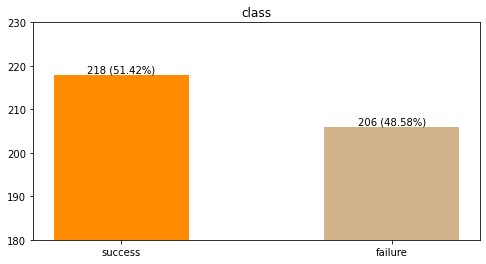

In [4]:
plt.figure(figsize=(8, 4))
plt.bar(["success","failure"],
        [len(y[y==1]),len(y[y==0])], 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['darkorange','tan'])

for xx,yy in zip(["success","failure"],[218,206]):
    plt.text(xx,yy,'%2d (%.2f%s)' %(yy,100*yy/424,"%"), ha='center',va='bottom')

plt.ylim(180,230)
plt.title("class")
plt.show()

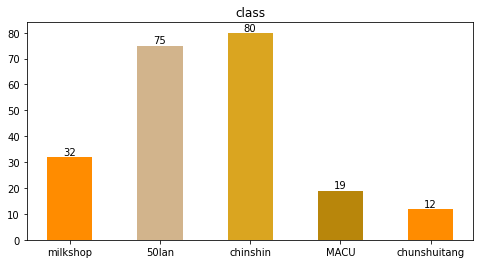

In [5]:
plt.figure(figsize=(8, 4))
plt.bar(["milkshop","50lan","chinshin","MACU","chunshuitang"],
        [32,75,80,19,12], 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['darkorange','tan','goldenrod', 'darkgoldenrod'])
for xx,yy in zip(["milkshop","50lan","chinshin","MACU","chunshuitang"], 
               [32,75,80,19,12]):
        plt.text(xx,yy,'%2d' %yy, ha='center',va='bottom')

plt.title("class")
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.reset_index().drop(["index"],axis=1)

,MRT_min_distance,MRT_count_500,MRT_count_1000,mall_distance500,mall_distance1000,school_distance500,school_distance1000,school_distance1500,spot_distance_1000,spot_distance_2000,...,大專,高中職,國中,國小,自修,不識字,所得中位數,購買力指數,零售飽和指數,租金
0,2.2,0,0,0,0,1,4,7,0,0,...,0.475760,0.246347,0.071909,0.080956,0.001624,0.005799,700,0.096850,1.276191e+09,420.000000
1,0.8,0,1,1,2,1,3,5,1,1,...,0.532583,0.203791,0.053318,0.052725,0.000790,0.002567,754,0.102633,9.015524e+08,558.000000
2,0.7,0,3,0,0,1,7,16,3,5,...,0.481257,0.234717,0.066897,0.084198,0.000865,0.004325,713,0.102633,9.015524e+08,735.666667
3,0.6,0,1,0,0,0,5,5,1,9,...,0.496926,0.232996,0.061075,0.079120,0.000793,0.004164,736,0.102633,9.015524e+08,924.000000
4,1.0,0,1,0,0,1,2,2,0,9,...,0.365425,0.283544,0.129538,0.141692,0.003518,0.009755,594,0.068733,1.220540e+09,283.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,3.1,0,0,0,0,0,0,1,0,0,...,0.491093,0.237175,0.065465,0.075767,0.001717,0.001932,721,0.102633,9.015524e+08,590.666667
335,1.0,0,1,0,0,2,2,6,2,8,...,0.556151,0.201957,0.048110,0.040472,0.000670,0.001206,762,0.081524,8.589323e+08,369.333333
336,0.9,0,1,1,4,0,1,1,2,2,...,0.507752,0.207215,0.052624,0.057841,0.001193,0.003131,1041,0.091203,4.504460e+08,639.666667
337,4.9,0,0,0,0,0,0,0,0,0,...,0.498281,0.247031,0.079062,0.067187,0.000469,0.004375,742,0.106293,1.025556e+09,413.666667


#### Select important features which have small p-value of logistic regression

In [7]:
import statsmodels.api as sm
data_feature_select=X
col = []
for i in range(len(data_feature_select.columns)):
    log_reg = sm.Logit(y, data_feature_select[data_feature_select.columns[i]]).fit()
    col.append([data_feature_select.columns[i],float(log_reg.pvalues)]) 

Optimization terminated successfully.
         Current function value: 0.630402
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.635428
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.628854
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.639234
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.644926
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.651783
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.619982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.638613
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.643221
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.642519
  

In [8]:
col

[['MRT_min_distance', 4.496378442217501e-10],
 ['MRT_count_500', 1.5840518999892718e-09],
 ['MRT_count_1000', 2.0731970193807286e-11],
 ['mall_distance500', 3.229166690945335e-05],
 ['mall_distance1000', 4.4542606983847084e-07],
 ['school_distance500', 1.447590530985009e-07],
 ['school_distance1000', 3.5267104146783493e-12],
 ['school_distance1500', 2.546279437594702e-10],
 ['spot_distance_1000', 4.63350038723683e-08],
 ['spot_distance_2000', 4.684427801160191e-09],
 ['spot_distance_3000', 1.3041431701056549e-08],
 ['spot_distance_4000', 1.068217155609307e-07],
 ['spot_distance_5000', 1.0047880018277804e-06],
 ['人口數-合計', 0.7213221199736555],
 ['男性比例', 0.6504372611038929],
 ['女性比例', 0.48400633754546474],
 ['人口密度', 1.0978532214426255e-08],
 ['平均年齡', 0.5156115571126514],
 ['20~59歲人數', 0.8639173950959796],
 ['20~59歲比例', 0.6788827145227161],
 ['合計_0~4歲', 0.6835586793000525],
 ['合計_5~9歲', 0.43728940312459397],
 ['合計_10~14歲', 0.28673627282468894],
 ['合計_15~19歲', 0.7746817879785614],
 ['合計_20~

The selected features and their p-values are list below:  
1. MRT_count_1000: 4.496378442217501e-10  
2. mall_distance1000: 4.4542606983847084e-07  
3. school_distance1000: 3.5267104146783493e-12  
4. spot_distance_2000: 4.684427801160191e-09  
5. poopulation density: 1.0978532214426182e-08  
6. rental cost: 0.0003492040977197921  

In [9]:
X_feseleced=X_train[['MRT_count_1000','mall_distance1000','school_distance1000','spot_distance_2000','人口密度','租金']]
X_train_val, X_val, y_train_val, y_val = train_test_split(X_feseleced, y_train, test_size=0.2, random_state=1)

#### Decision tree model
Build the decision tree model by the selected features and tune hyperparameter "max_depth" from 1 to 15

In [10]:
acc=[]
depth=[]
for i in range(1,15):
    tree_model=DecisionTreeClassifier(random_state=87,max_depth = i)
    tree_model.fit(X_train_val,y_train_val)
    acc.append(tree_model.score(X_val,y_val))
    depth.append(i)

print(acc)
print(acc.index(max(acc))+1)

[0.75, 0.7794117647058824, 0.8529411764705882, 0.8382352941176471, 0.8382352941176471, 0.75, 0.7941176470588235, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7941176470588235, 0.7941176470588235, 0.7941176470588235, 0.7941176470588235]
3


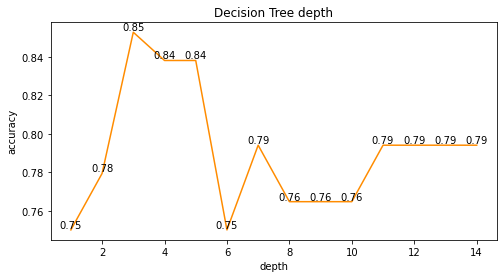

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(depth,acc,color='darkorange')
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.title("Decision Tree depth")
for x,y in zip(depth, 
               acc):
        plt.text(x,y,'%.2f' %y, ha='center',va='bottom')

#### Random forest model
Build the random forest model by the selected features and tune hyperparameter "max_depth"

In [12]:
from sklearn.ensemble import RandomForestClassifier

max_depth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
acc_rf=[]
max_acc=0
max_dept=0
for md in range(len(max_depth)):
    forest_model=RandomForestClassifier(random_state=87,n_estimators=100,max_depth=max_depth[md])

    forest_model.fit(X_train_val,y_train_val)
    accuracy=forest_model.score(X_val,y_val)
    acc_rf.append(accuracy)
    print("max_depth:%2d,accuracy:%f"%(max_depth[md],accuracy))
    if max_acc<accuracy:
        max_acc=accuracy
        max_dept=max_depth[md]

print("Best: max_depth:%2d,accuracy:%f"%(max_dept,max_acc))


max_depth: 1,accuracy:0.808824
max_depth: 2,accuracy:0.823529
max_depth: 3,accuracy:0.838235
max_depth: 4,accuracy:0.867647
max_depth: 5,accuracy:0.867647
max_depth: 6,accuracy:0.867647
max_depth: 7,accuracy:0.823529
max_depth: 8,accuracy:0.838235
max_depth: 9,accuracy:0.838235
max_depth:10,accuracy:0.823529
max_depth:11,accuracy:0.838235
max_depth:12,accuracy:0.838235
max_depth:13,accuracy:0.838235
max_depth:14,accuracy:0.838235
max_depth:15,accuracy:0.838235
Best: max_depth: 4,accuracy:0.867647


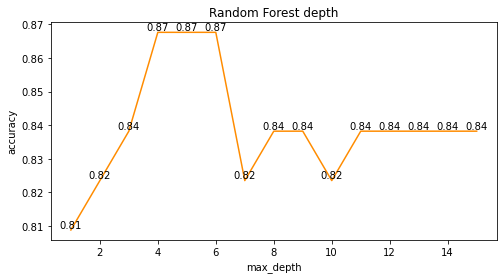

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(max_depth,acc_rf,color='darkorange')
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Random Forest depth")
for x,y in zip(max_depth, 
               acc_rf):
        plt.text(x,y,'%.2f' %y, ha='center',va='bottom')

#### Gradient Boosting Decision Tree (GBDT) model
Build the GBDT model by the selected features and tune hyperparameter "max_depth"

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
max_depth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
acc_gb=[]
max_acc=0
max_dept=0
for md in range(len(max_depth)):
    gb_model=GradientBoostingClassifier(n_estimators=100,max_depth=max_depth[md])

    gb_model.fit(X_train_val,y_train_val)
    accuracy=gb_model.score(X_val,y_val)
    acc_gb.append(accuracy)
    print("max_depth:%2d,accuracy:%f"%(max_depth[md],accuracy))
    if max_acc<accuracy:
        max_acc=accuracy
        max_dept=max_depth[md]
print("Best: max_depth:%2d,accuracy:%f"%(max_dept,max_acc))

max_depth: 1,accuracy:0.867647
max_depth: 2,accuracy:0.867647
max_depth: 3,accuracy:0.838235
max_depth: 4,accuracy:0.823529
max_depth: 5,accuracy:0.808824
max_depth: 6,accuracy:0.779412
max_depth: 7,accuracy:0.808824
max_depth: 8,accuracy:0.794118
max_depth: 9,accuracy:0.794118
max_depth:10,accuracy:0.779412
max_depth:11,accuracy:0.779412
max_depth:12,accuracy:0.794118
max_depth:13,accuracy:0.764706
max_depth:14,accuracy:0.779412
max_depth:15,accuracy:0.794118
Best: max_depth: 1,accuracy:0.867647


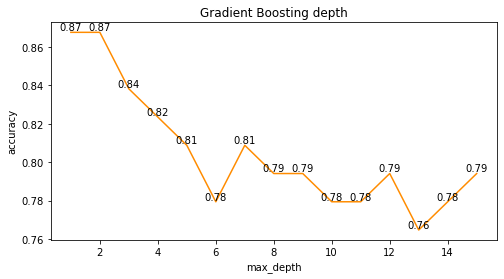

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(max_depth,acc_gb,color='darkorange')
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Gradient Boosting depth")
for x,y in zip(max_depth, 
               acc_gb):
        plt.text(x,y,'%.2f' %y, ha='center',va='bottom')

#### Comparison between different models
indicators: accuracy, precision, recall, f1, accuracy

In [16]:
X_all_selected=X[['MRT_count_1000','mall_distance1000','school_distance1000','spot_distance_2000','人口密度','租金']]
y=data["選址成功"]

In [17]:
tree_model=DecisionTreeClassifier(random_state=87,max_depth = 3)
accuracy_dt=cross_val_score(tree_model,X_all_selected,y,scoring='accuracy',cv=10)
precision_dt=cross_val_score(tree_model,X_all_selected,y,scoring='precision',cv=10)
recall_dt=cross_val_score(tree_model,X_all_selected,y,scoring='recall',cv=10)
f1_dt=cross_val_score(tree_model,X_all_selected,y,scoring='f1',cv=10)
auc_dt=cross_val_score(tree_model,X_all_selected,y,scoring='roc_auc',cv=10)
print(accuracy_dt)
print("accuracy mean:",accuracy_dt.mean())
print("precision mean:",precision_dt.mean())
print("recall mean:",recall_dt.mean())
print("f1 mean:",f1_dt.mean())
print("auc mean:",auc_dt.mean())

[0.81395349 0.88372093 0.76744186 0.6744186  0.66666667 0.76190476
 0.73809524 0.76190476 0.92857143 0.78571429]
accuracy mean: 0.7782392026578073
precision mean: 0.7529454064454064
recall mean: 0.8588744588744589
f1 mean: 0.798076641432661
auc mean: 0.8288984230055657


In [18]:
forest_model=RandomForestClassifier(random_state=87,max_depth = 4)
accuracy_rf=cross_val_score(forest_model,X_all_selected,y,scoring='accuracy',cv=10)
precision_rf=cross_val_score(forest_model,X_all_selected,y,scoring='precision',cv=10)
recall_rf=cross_val_score(forest_model,X_all_selected,y,scoring='recall',cv=10)
f1_rf=cross_val_score(forest_model,X_all_selected,y,scoring='f1',cv=10)
auc_rf=cross_val_score(forest_model,X_all_selected,y,scoring='roc_auc',cv=10)
print(accuracy_rf)
print("accuracy mean:",accuracy_rf.mean())
print("precision mean:",precision_rf.mean())
print("recall mean:",recall_rf.mean())
print("f1 mean:",f1_rf.mean())
print("auc mean:",auc_rf.mean())

[0.81395349 0.86046512 0.81395349 0.6744186  0.80952381 0.78571429
 0.78571429 0.85714286 0.92857143 0.83333333]
accuracy mean: 0.8162790697674419
precision mean: 0.7849691789691791
recall mean: 0.8952380952380953
f1 mean: 0.8340133143364279
auc mean: 0.8826479076479077


In [19]:
gb_model=GradientBoostingClassifier(random_state=87,max_depth = 1)
accuracy_gb=cross_val_score(gb_model,X_all_selected,y,scoring='accuracy',cv=10)
precision_gb=cross_val_score(gb_model,X_all_selected,y,scoring='precision',cv=10)
recall_gb=cross_val_score(gb_model,X_all_selected,y,scoring='recall',cv=10)
f1_gb=cross_val_score(gb_model,X_all_selected,y,scoring='f1',cv=10)
auc_gb=cross_val_score(gb_model,X_all_selected,y,scoring='roc_auc',cv=10)
print(accuracy_gb)
print("accuracy mean:",accuracy_gb.mean())
print("precision mean:",precision_gb.mean())
print("recall mean:",recall_gb.mean())
print("f1 mean:",f1_gb.mean())
print("auc mean:",auc_gb.mean())

[0.76744186 0.86046512 0.76744186 0.6744186  0.71428571 0.78571429
 0.76190476 0.78571429 0.92857143 0.76190476]
accuracy mean: 0.7807862679955704
precision mean: 0.7634649385702017
recall mean: 0.8448051948051948
f1 mean: 0.7987909407542322
auc mean: 0.8476806328592043


In [20]:
from sklearn import preprocessing, linear_model

lr_model = linear_model.LogisticRegression(random_state=87,max_iter=10000)
accuracy_lr=cross_val_score(lr_model,X_all_selected,y,scoring='accuracy',cv=10)
precision_lr=cross_val_score(lr_model,X_all_selected,y,scoring='precision',cv=10)
recall_lr=cross_val_score(lr_model,X_all_selected,y,scoring='recall',cv=10)
f1_lr=cross_val_score(lr_model,X_all_selected,y,scoring='f1',cv=10)
auc_lr=cross_val_score(lr_model,X_all_selected,y,scoring='roc_auc',cv=10)
print(accuracy_lr)
print("accuracy mean:",accuracy_lr.mean())
print("precision mean:",precision_lr.mean())
print("recall mean:",recall_lr.mean())
print("f1 mean:",f1_lr.mean())
print("auc mean:",auc_lr.mean())

[0.76744186 0.88372093 0.79069767 0.69767442 0.69047619 0.76190476
 0.78571429 0.78571429 0.83333333 0.88095238]
accuracy mean: 0.7877630121816168
precision mean: 0.8051418408442836
recall mean: 0.7984848484848485
f1 mean: 0.7962190572180146
auc mean: 0.8396701710987425


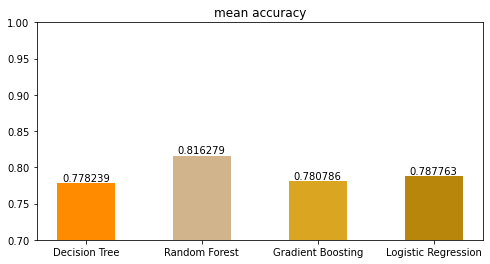

In [21]:
plt.figure(figsize=(8, 4))
plt.bar(["Decision Tree","Random Forest","Gradient Boosting","Logistic Regression"],
        [accuracy_dt.mean(),accuracy_rf.mean(),accuracy_gb.mean(),accuracy_lr.mean()], 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['darkorange','tan','goldenrod','darkgoldenrod'])
for xx,yy in zip(["Decision Tree","Random Forest","Gradient Boosting","Logistic Regression"], 
               [accuracy_dt.mean(),accuracy_rf.mean(),accuracy_gb.mean(),accuracy_lr.mean()]):
        plt.text(xx,yy,'%2f' %yy, ha='center',va='bottom')
plt.ylim(0.7,1)
plt.title("mean accuracy")
plt.show()

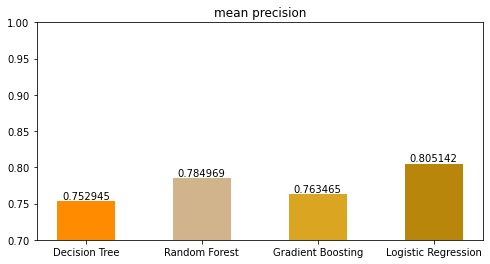

In [22]:
plt.figure(figsize=(8, 4))
plt.bar(["Decision Tree","Random Forest","Gradient Boosting","Logistic Regression"],
        [precision_dt.mean(),precision_rf.mean(),precision_gb.mean(),precision_lr.mean()], 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['darkorange','tan','goldenrod', 'darkgoldenrod' ])
for xx,yy in zip(["Decision Tree","Random Forest","Gradient Boosting","Logistic Regression"], 
               [precision_dt.mean(),precision_rf.mean(),precision_gb.mean(),precision_lr.mean()]):
        plt.text(xx,yy,'%2f' %yy, ha='center',va='bottom')
plt.ylim(0.7,1)
# plt.xticks(rotation='vertical')
plt.title("mean precision")
plt.show()

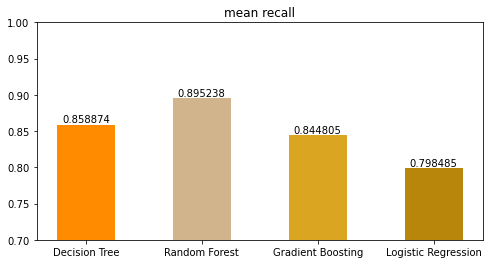

In [23]:
plt.figure(figsize=(8, 4))
plt.bar(["Decision Tree","Random Forest","Gradient Boosting","Logistic Regression"],
        [recall_dt.mean(),recall_rf.mean(),recall_gb.mean(),recall_lr.mean()], 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['darkorange', 'tan','goldenrod', 'darkgoldenrod' ])
for xx,yy in zip(["Decision Tree","Random Forest","Gradient Boosting","Logistic Regression"], 
               [recall_dt.mean(),recall_rf.mean(),recall_gb.mean(),recall_lr.mean()]):
        plt.text(xx,yy,'%2f' %yy, ha='center',va='bottom')
plt.ylim(0.7,1)
# plt.xticks(rotation='vertical')
plt.title("mean recall")
plt.show()

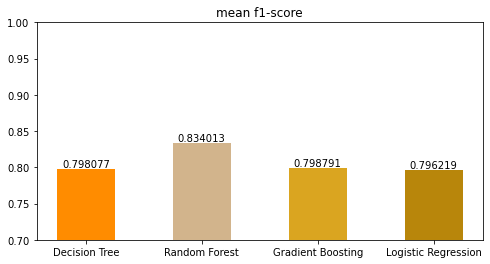

In [24]:
plt.figure(figsize=(8, 4))
plt.bar(["Decision Tree","Random Forest","Gradient Boosting","Logistic Regression"],
        [f1_dt.mean(),f1_rf.mean(),f1_gb.mean(),f1_lr.mean()], 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['darkorange','tan','goldenrod', 'darkgoldenrod'])
for xx,yy in zip(["Decision Tree","Random Forest","Gradient Boosting","Logistic Regression"], 
               [f1_dt.mean(),f1_rf.mean(),f1_gb.mean(),f1_lr.mean()]):
        plt.text(xx,yy,'%2f' %yy, ha='center',va='bottom')
plt.ylim(0.7,1)
# plt.xticks(rotation='vertical')
plt.title("mean f1-score")
plt.show()

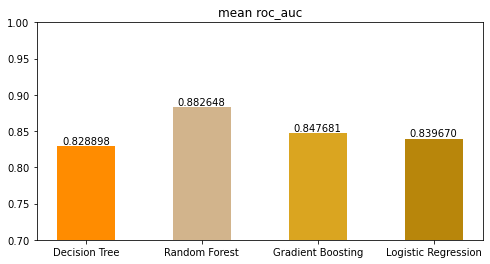

In [25]:
plt.figure(figsize=(8, 4))
plt.bar(["Decision Tree","Random Forest","Gradient Boosting","Logistic Regression"],
        [auc_dt.mean(),auc_rf.mean(),auc_gb.mean(),auc_lr.mean()], 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['darkorange','tan','goldenrod', 'darkgoldenrod'])
for xx,yy in zip(["Decision Tree","Random Forest","Gradient Boosting","Logistic Regression"], 
               [auc_dt.mean(),auc_rf.mean(),auc_gb.mean(),auc_lr.mean()]):
        plt.text(xx,yy,'%2f' %yy, ha='center',va='bottom')
plt.ylim(0.7,1)
# plt.xticks(rotation='vertical')
plt.title("mean roc_auc")
plt.show()

#### Other analysis

##### p-values and coefficient of selected features in logistic model which was built only by selected features

In [26]:
lr_model = linear_model.LogisticRegression(random_state=87,max_iter=10000)
lr_model.fit(X_all_selected,y)

for i in range(6):
    print(X_all_selected.columns[i],lr_model.coef_[0][i])

MRT_count_1000 0.1480282470939982
mall_distance1000 0.25779036588564297
school_distance1000 0.3401113238099719
spot_distance_2000 -0.027183284991894943
人口密度 9.62725411065733e-06
租金 -0.0011738695618443656


##### Visualize the Decision Tree 
We find that the most important factor in decision tree model is "school_distance1000" (the number of school within 1000 meters). Popultaion density is the second most important factor. 

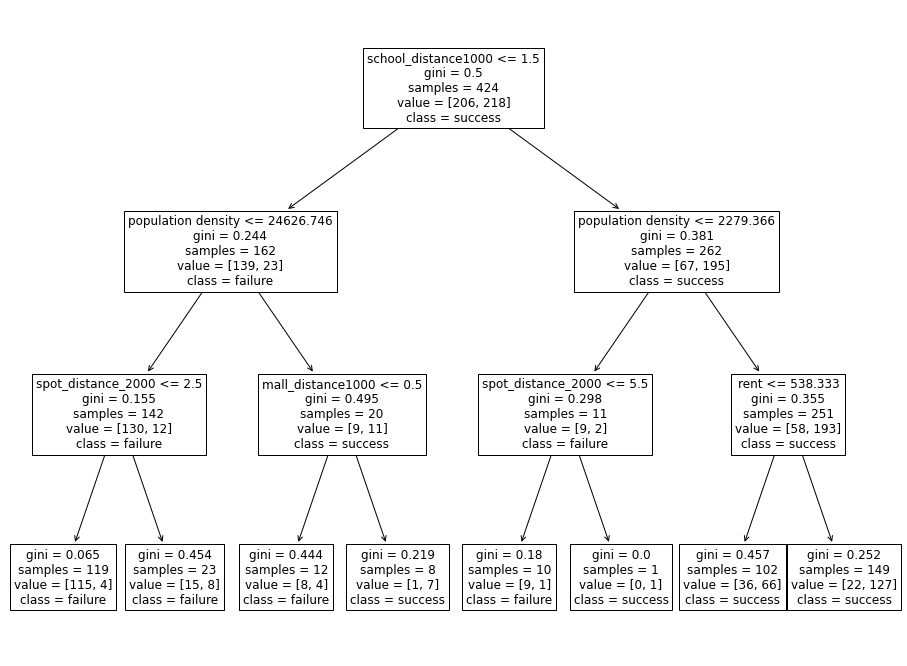

In [27]:
from sklearn import tree
X=data[['MRT_count_1000','mall_distance1000','school_distance1000','spot_distance_2000','人口密度','租金']]
y=data["選址成功"]
tree_model=DecisionTreeClassifier(random_state=87,max_depth=3)
tree_model.fit(X,y)
plt.figure(figsize=(16,12))
tree.plot_tree(tree_model,feature_names=['MRT_count_1000','mall_distance1000','school_distance1000','spot_distance_2000','population density','rent'],
              class_names=["failure","success"],fontsize=12)  

# plt.show()
plt.savefig('tree.png',transparent = False)

### Conclusion
1. We find that "the number of school within 1000 meters", "population density", "the number of important spot within 2000 meters", "the number of mall within 2000 meters" and "rental cost" may be the key factors of the location selecition of beverage stores. 
2. According to the comparison table below, we find that random forest model with max-depth=4 is the best model, which outperform other models by every indicator.  

| model / indicator    	| accuracy 	| precision 	| recall 	| f1-score 	| roc_auc 	|
|----------------------	|----------	|-----------	|--------	|----------	|---------	|
| Decision Tree        	| 0.778    	| 0.753     	| 0.859  	| 0.798    	| 0.829   	|
| Random Forest        	| 0.816    	| 0.785     	| 0.895  	| 0.834    	| 0.882   	|
| Gradient Boosting    	| 0.781    	| 0.763     	| 0.845  	| 0.799    	| 0.848   	|
| Logistic Regresision 	| 0.781    	| 0.763     	| 0.845  	| 0.799    	| 0.848   	|